In [1]:
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

# heatmap
import math
from scipy.stats import multivariate_normal

# animation
from matplotlib.animation import FuncAnimation

In [2]:
# train.csv file
df = pd.read_csv(f"../data/train.csv")
df["path"] = df["path"].apply(lambda row: f"../data/{row}")
df.head()

,path,participant_id,sequence_id,sign
0,../data/train_landmark_files/26734/1000035562....,26734,1000035562,blow
1,../data/train_landmark_files/28656/1000106739....,28656,1000106739,wait
2,../data/train_landmark_files/16069/100015657.p...,16069,100015657,cloud
3,../data/train_landmark_files/25571/1000210073....,25571,1000210073,bird
4,../data/train_landmark_files/62590/1000240708....,62590,1000240708,owie


In [3]:
len(df)

94477

In [4]:
NUM_JOINTS = 543

LIP = [
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 146, 91, 181, 84, 17, 314, 405, 321, 375,
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    95, 88, 178, 87, 14, 317, 402, 318, 324, 308,
]

RIGHT_EYE = [
    246, 161, 160, 159, 158, 157, 173,
    33, 7, 163, 144, 145, 153, 154, 155, 133,
    247, 30, 29, 27, 28, 56, 190,
    130, 25, 110, 24, 23, 22, 26, 112, 243,
    113, 225, 224, 223, 222, 221, 189,
    226, 31, 228, 229, 230, 231, 232, 233, 244,
    143, 111, 117, 118, 119, 120, 121, 128, 245,
]

LEFT_EYE = [
    466, 387, 386, 385, 384, 398,
    263, 249, 390, 373, 374, 380, 381, 382, 362,
    467, 260, 259, 257, 258, 286, 414,
    359, 255, 339, 254, 253, 252, 256, 341, 463,
    342, 445, 444, 443, 442, 441, 413,
    446, 261, 448, 449, 450, 451, 452, 453, 464,
    372, 340, 346, 347, 348, 349, 350, 357, 465,
]

LEFT_HAND = [
    468, 469, 470, 471, 472, 473, 474, 475,
    476, 477, 478, 479, 480, 481, 482, 483,
    484, 485, 486, 487, 488
]

RIGHT_HAND = [
    522, 523, 524, 525, 526, 527, 528, 529,
    530, 531, 532, 533, 534, 535, 536, 537,
    538, 539, 540, 541, 542
]

In [5]:
idx = 100

landmark_df = pd.read_parquet(df.loc[idx].path)
landmark_df

,frame,row_id,type,landmark_index,x,y,z
0,0,0-face-0,face,0,0.425013,0.384484,-0.039359
1,0,0-face-1,face,1,0.414999,0.334925,-0.078130
2,0,0-face-2,face,2,0.419444,0.345982,-0.039070
3,0,0-face-3,face,3,0.397874,0.295141,-0.059470
4,0,0-face-4,face,4,0.412729,0.323081,-0.083896
...,...,...,...,...,...,...,...
32032,58,58-right_hand-16,right_hand,16,NaN,NaN,NaN
32033,58,58-right_hand-17,right_hand,17,NaN,NaN,NaN
32034,58,58-right_hand-18,right_hand,18,NaN,NaN,NaN
32035,58,58-right_hand-19,right_hand,19,NaN,NaN,NaN


In [6]:
tmp = landmark_df.loc[landmark_df.frame==0]
tmp.loc[tmp.type=="pose"]

,frame,row_id,type,landmark_index,x,y,z
489,0,0-pose-0,pose,0,0.427018,0.319976,-1.125882
490,0,0-pose-1,pose,1,0.468264,0.262829,-1.069302
491,0,0-pose-2,pose,2,0.499326,0.261374,-1.069536
492,0,0-pose-3,pose,3,0.523989,0.261058,-1.069469
493,0,0-pose-4,pose,4,0.372725,0.268568,-1.046240
494,0,0-pose-5,pose,5,0.346510,0.270600,-1.045546
495,0,0-pose-6,pose,6,0.325438,0.272631,-1.046191
496,0,0-pose-7,pose,7,0.565692,0.281926,-0.626231
497,0,0-pose-8,pose,8,0.306976,0.294595,-0.491890
498,0,0-pose-9,pose,9,0.492407,0.376978,-0.956025


In [7]:
print("Number of frames: ", int(len(landmark_df)/NUM_JOINTS))

Number of frames:  59


In [8]:
f_0 = landmark_df.loc[landmark_df.frame == 20]
f_0.head()

,frame,row_id,type,landmark_index,x,y,z
10860,20,20-face-0,face,0,0.440591,0.381708,-0.040288
10861,20,20-face-1,face,1,0.423508,0.332615,-0.077396
10862,20,20-face-2,face,2,0.427506,0.343498,-0.039368
10863,20,20-face-3,face,3,0.407110,0.295480,-0.058578
10864,20,20-face-4,face,4,0.421523,0.321340,-0.082764


In [9]:
set(f_0.type.values)

{'face', 'left_hand', 'pose', 'right_hand'}

In [10]:
f0_face = f_0.loc[f_0.type == "face"][["x", "y", "z"]].values[LIP]
f0_pose = f_0.loc[f_0.type == "pose"][["x", "y", "z"]].values[:-8]
f0_rh = f_0.loc[f_0.type == "right_hand"][["x", "y", "z"]].values
f0_lh = f_0.loc[f_0.type == "left_hand"][["x", "y", "z"]].values

In [11]:
np.expand_dims(f0_face, axis=0).shape

(1, 40, 3)

In [12]:
human = np.concatenate([f0_face, f0_pose, f0_rh, f0_lh], axis=0)
human.shape

(107, 3)

In [13]:
num_frame = int(len(landmark_df)/NUM_JOINTS)
num_c = 107
img_h = 64
img_w = 64

ret = np.zeros([num_frame, num_c, img_h, img_w], dtype=np.float32) # T x V x H x W (or T x K x H x W to match paper)
arr = ret[0]

In [14]:
# 1, V, C 
kps = np.expand_dims(human, axis=0) # (1, 25, 3)
print(kps.shape)
# M, C
all_kpscores = np.ones((1,num_frame,num_c), dtype=np.float32)
kpscores = np.ones_like(all_kpscores[:, 0])
print(kpscores.shape)

# self.generate_heatmap(ret[i], kps, kpscores)

(1, 107, 3)
(1, 107)


In [15]:
def generate_a_heatmap(arr, centers, max_values):
    """Generate pseudo heatmap for one keypoint in one frame.

    Args:
        arr (np.ndarray): The array to store the generated heatmaps. Shape: img_h * img_w.
        centers (np.ndarray): The coordinates of corresponding keypoints (of multiple persons). Shape: M * 2.
        max_values (np.ndarray): The max values of each keypoint. Shape: M.

    Returns:
        np.ndarray: The generated pseudo heatmap.
    """

    sigma = 0.1
    img_h, img_w = arr.shape

    for center, max_value in zip(centers, max_values):
        mu_x, mu_y = center[0], center[1]
        if not (np.isnan(mu_x) and np.isnan(mu_y)):
            # scale
            mu_x = min(math.floor(mu_x * img_w), img_w - 1)
            mu_y = min(math.floor(mu_y * img_h), img_h - 1)

            st_x = max(int(mu_x - 0.5 * sigma), 0)
            ed_x = min(int(mu_x + 0.5 * sigma) + 1, img_w)
            st_y = max(int(mu_y - 0.5 * sigma), 0)
            ed_y = min(int(mu_y + 0.5 * sigma) + 1, img_h)
            x = np.arange(st_x, ed_x, 1, np.float32)
            y = np.arange(st_y, ed_y, 1, np.float32)

            # if the keypoint not in the heatmap coordinate system
            if not (len(x) and len(y)):
                continue
            y = y[:, None]

            patch = np.exp(-((x - mu_x)**2 + (y - mu_y)**2) / 2 / sigma**2)
            patch = patch * max_value
            arr[st_y:ed_y, st_x:ed_x] = np.maximum(arr[st_y:ed_y, st_x:ed_x], patch)

In [16]:
frames = landmark_df.frame.unique()

num_frame = len(frames)
num_c = 107
img_h = 56
img_w = 56

ret = np.zeros([num_frame, num_c, img_h, img_w], dtype=np.float32) # T x V x H x W (or T x K x H x W to match paper)

faces, poses, rhs, lhs = [],[],[],[]
humans = []

for i, frame in tqdm(enumerate(frames)):
    arr = ret[i]

    # Get the frame and associated parts
    f = landmark_df.loc[landmark_df.frame == frame]
    face = f.loc[f.type == "face"][["x", "y", "z"]].values[LIP]
    pose = f.loc[f.type == "pose"][["x", "y", "z"]].values[:-8]
    rh = f.loc[f.type == "right_hand"][["x", "y", "z"]].values
    lh = f.loc[f.type == "left_hand"][["x", "y", "z"]].values

    human = np.concatenate([face, pose, rh, lh], axis=0)
    # normalize
    human = human[~np.ma.fix_invalid(human).mask.any(axis=1)]
    x, y = human[:,:1], human[:,1:2]
    
    # TODO: Normalize the whole sequence together
    x = (x-np.min(x))/(np.max(x)-np.min(x))
    y = (y-np.min(y))/(np.max(y)-np.min(y))

    human = np.squeeze(np.array(list(zip(x, y))), axis=-1)
    
    kps = np.expand_dims(human, axis=0)
    all_kpscores = np.ones((1,num_frame,num_c), dtype=np.float32)
    kpscores = np.ones_like(all_kpscores[:, 0])
    
    num_kp = kps.shape[1]
    for i in range(num_kp):
        generate_a_heatmap(arr[i], kps[:, i], kpscores[:, i])

59it [00:00, 129.44it/s]


In [18]:
f = landmark_df.loc[landmark_df.frame == frame]
face = f.loc[f.type == "face"][["x", "y", "z"]].values[LIP]
pose = f.loc[f.type == "pose"][["x", "y", "z"]].values[:-8]
rh = f.loc[f.type == "right_hand"][["x", "y", "z"]].values
lh = f.loc[f.type == "left_hand"][["x", "y", "z"]].values

human = np.concatenate([face, pose, rh, lh], axis=0)

human.shape

(107, 3)

In [27]:
human

array([[ 3.99203598e-01,  4.03576642e-01,  1.83021240e-02],
       [ 4.04224247e-01,  4.00499582e-01,  4.48923931e-03],
       [ 4.11246955e-01,  3.97243500e-01, -9.11015086e-03],
       [ 4.20485467e-01,  3.93039972e-01, -2.15116423e-02],
       [ 4.34063017e-01,  3.88621211e-01, -3.25446613e-02],
       [ 4.50608253e-01,  3.90453219e-01, -3.61797363e-02],
       [ 4.66305852e-01,  3.85579884e-01, -3.60188894e-02],
       [ 4.81638968e-01,  3.87106895e-01, -2.88168751e-02],
       [ 4.92828399e-01,  3.89462590e-01, -1.90771557e-02],
       [ 5.01775861e-01,  3.91309947e-01, -7.68887950e-03],
       [ 5.08918583e-01,  3.93396974e-01,  4.85383393e-03],
       [ 4.04682964e-01,  4.07210350e-01,  9.37207509e-03],
       [ 4.12105173e-01,  4.11347240e-01, -9.14221280e-04],
       [ 4.23699051e-01,  4.16584402e-01, -8.44112784e-03],
       [ 4.38535273e-01,  4.20036286e-01, -1.48921283e-02],
       [ 4.55506682e-01,  4.19989705e-01, -1.71486381e-02],
       [ 4.72139806e-01,  4.17338908e-01

In [19]:
human[~np.ma.fix_invalid(human).mask.any(axis=1)]

array([[ 3.99203598e-01,  4.03576642e-01,  1.83021240e-02],
       [ 4.04224247e-01,  4.00499582e-01,  4.48923931e-03],
       [ 4.11246955e-01,  3.97243500e-01, -9.11015086e-03],
       [ 4.20485467e-01,  3.93039972e-01, -2.15116423e-02],
       [ 4.34063017e-01,  3.88621211e-01, -3.25446613e-02],
       [ 4.50608253e-01,  3.90453219e-01, -3.61797363e-02],
       [ 4.66305852e-01,  3.85579884e-01, -3.60188894e-02],
       [ 4.81638968e-01,  3.87106895e-01, -2.88168751e-02],
       [ 4.92828399e-01,  3.89462590e-01, -1.90771557e-02],
       [ 5.01775861e-01,  3.91309947e-01, -7.68887950e-03],
       [ 5.08918583e-01,  3.93396974e-01,  4.85383393e-03],
       [ 4.04682964e-01,  4.07210350e-01,  9.37207509e-03],
       [ 4.12105173e-01,  4.11347240e-01, -9.14221280e-04],
       [ 4.23699051e-01,  4.16584402e-01, -8.44112784e-03],
       [ 4.38535273e-01,  4.20036286e-01, -1.48921283e-02],
       [ 4.55506682e-01,  4.19989705e-01, -1.71486381e-02],
       [ 4.72139806e-01,  4.17338908e-01

In [24]:
num_kp = kps.shape[1]
num_kp
for i in range(num_kp):
    generate_a_heatmap(arr[i], kps[:, i], kpscores[:, i])

In [25]:
def vis_heatmaps(heatmaps, channel=-1, ratio=8):
    # if channel is -1, draw all keypoints / limbs on the same map
    import matplotlib.cm as cm
    heatmaps = [x.transpose(1, 2, 0) for x in heatmaps]
    h, w, _ = heatmaps[0].shape
    newh, neww = int(h * ratio), int(w * ratio)

    if channel == -1:
        heatmaps = [np.max(x, axis=-1) for x in heatmaps]
    cmap = cm.viridis
    heatmaps = [(cmap(x)[..., :3] * 255).astype(np.uint8) for x in heatmaps]
    heatmaps = [cv2.resize(x, (neww, newh)) for x in heatmaps]
    return heatmaps

In [26]:
import cv2

keypoint_humans = []

for arr in ret:
    keypoint_mapvis = vis_heatmaps(np.expand_dims(arr, axis=0), ratio=1)
    keypoint_humans.append(keypoint_mapvis[0])

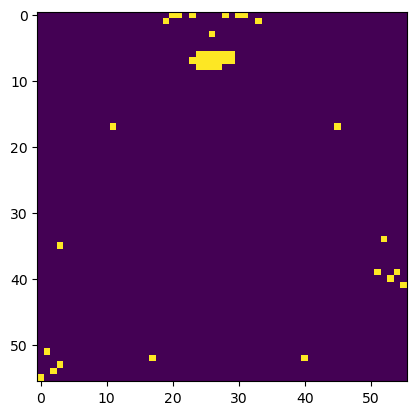

In [27]:
plt.imshow(keypoint_humans[3])

In [12]:
def points_to_gaussian_heatmap(centers, height, width, scale):
    gaussians = []
    for x,y in centers:
        s = np.eye(2)*scale
        
        if not (np.isnan(x) and np.isnan(y)):
            # unnormalize centers
            x = min(math.floor(x * width), width - 1)
            y = min(math.floor(y * height), height - 1)

            g = multivariate_normal(mean=(x,y), cov=s)
            gaussians.append(g)

    # create a grid of (x,y) coordinates at which to evaluate the kernels
    x = np.arange(0, width)
    y = np.arange(0, height)
    xx, yy = np.meshgrid(x,y)
    xxyy = np.stack([xx.ravel(), yy.ravel()]).T
    
    # evaluate kernels at grid points
    zz = sum(g.pdf(xxyy) for g in gaussians)
    
    if len(gaussians) !=0:
        img = zz.reshape((height,width))
    else:
        img = np.zeros(shape=(height, width))

    return img

W = 64  # width of heatmap
H = 64  # height of heatmap
SCALE = 0.5  # increase scale to make larger gaussians

In [13]:
frames = landmark_df.frame.unique()

faces, poses, rhs, lhs = [],[],[],[]
humans = []

for frame in tqdm(frames):
    # Get the frame and associated parts
    f = landmark_df.loc[landmark_df.frame == frame]
    face = f.loc[f.type == "face"][["x", "y", "z"]].values[LIP]
    pose = f.loc[f.type == "pose"][["x", "y", "z"]].values[:-8]
    rh = f.loc[f.type == "right_hand"][["x", "y", "z"]].values
    lh = f.loc[f.type == "left_hand"][["x", "y", "z"]].values

    human = np.concatenate([face, pose, rh, lh], axis=0)
    # normalize
    human = human[~np.ma.fix_invalid(human).mask.any(axis=1)]
    x, y = human[:,:1], human[:,1:2]
    
    # TODO: Normalize the whole sequence together
    x = (x-np.min(x))/(np.max(x)-np.min(x))
    y = (y-np.min(y))/(np.max(y)-np.min(y))

    human = np.squeeze(np.array(list(zip(x, y))), axis=-1)

#     face_img = points_to_gaussian_heatmap(face[:,:2], H, W, SCALE)
#     pose_img = points_to_gaussian_heatmap(pose[:,:2], H, W, SCALE)
#     rh_img = points_to_gaussian_heatmap(rh[:,:2], H, W, SCALE)
#     lh_img = points_to_gaussian_heatmap(lh[:,:2], H, W, SCALE)
    
    img = points_to_gaussian_heatmap(human, H, W, SCALE)
    
#     faces.append(face_img)
#     poses.append(pose_img)
#     rhs.append(rh_img)
#     lhs.append(lh_img)
    
    humans.append(img)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:02<00:00, 25.33it/s]


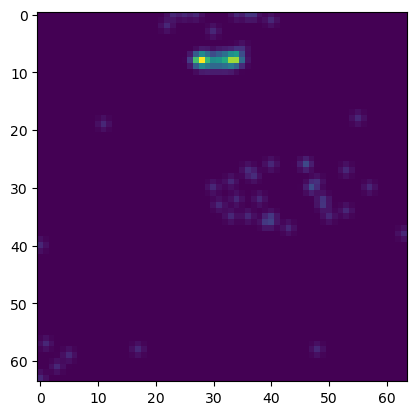

In [14]:
plt.imshow(img); plt.show()

In [73]:
fig, ax = plt.subplots(figsize=(5, 8))

arr = keypoint_humans

def update(i):
    im_normed = arr[i]
    ax.imshow(im_normed)
    ax.set_title(f"human_{i}", fontsize=20)
    ax.set_axis_off()


anim = FuncAnimation(fig, update, frames=np.arange(0, len(arr)), interval=10)
anim.save('humanpose3d.gif', dpi=80, writer='imagemagick')
plt.close()

MovieWriter imagemagick unavailable; using Pillow instead.


In [34]:
np.array(humans).shape

(59, 64, 64)

In [36]:
import tensorflow as tf

In [79]:
# The inputs are 28x28x28 volumes with a single channel, and the
# batch size is 4
input_shape = ret.shape+(1,)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv3D(32, 7, activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)

(59, 101, 58, 58, 32)


In [80]:
ret.shape

(59, 107, 64, 64)